## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sets = pd.read_csv('datasets/lego_sets.csv')
themes = pd.read_csv('datasets/parent_themes.csv')


print('lego sets:')
print(f'columns:{sets.columns}\n')
print(sets.head(3))


print('parent themes:')
print(f'columns:{themes.columns}\n')
print(themes.head(3))

lego sets:
columns:Index(['set_num', 'name', 'year', 'num_parts', 'theme_name', 'parent_theme'], dtype='object')

  set_num                        name  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   

  parent_theme  
0     Legoland  
1         Town  
2       Castle  
parent themes:
columns:Index(['id', 'name', 'is_licensed'], dtype='object')

   id     name  is_licensed
0   1  Technic        False
1  22  Creator        False
2  50     Town        False


In [2]:
sets = sets.drop_duplicates(subset = 'set_num').dropna(subset = 'set_num')
sets['set_num'].isna().sum()

0

In [3]:
print(themes.value_counts('is_licensed'))

licensed_themes = themes[themes['is_licensed'] == True]
licensed_themes

is_licensed
False    89
True     22
Name: count, dtype: int64


,id,name,is_licensed
7,158,Star Wars,True
12,246,Harry Potter,True
16,263,Pirates of the Caribbean,True
17,264,Indiana Jones,True
18,269,Cars,True
19,270,Ben 10,True
20,271,Prince of Persia,True
21,272,SpongeBob SquarePants,True
23,275,Toy Story,True
33,317,Avatar,True


In [4]:
licensed_sets = sets.merge(licensed_themes, left_on = 'parent_theme', right_on = 'name')
del(licensed_sets['name_y'])

licensed_sets

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
1,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
2,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
4,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
1174,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
1175,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
1176,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
1177,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


                        parent_theme  count
0                          Star Wars    609
1                       Super Heroes    242
2                       Harry Potter     67
3   The Hobbit and Lord of the Rings     40
4                          Minecraft     30
5                    Disney Princess     29
6                               Cars     27
7       Teenage Mutant Ninja Turtles     21
8                      Indiana Jones     19
9           Pirates of the Caribbean     17
10                         Toy Story     15
11             SpongeBob SquarePants     14
12                   The Lone Ranger      8
13                    Jurassic World      7
14                  Prince of Persia      6
15                        Scooby-Doo      6
16             Disney's Mickey Mouse      6
17                            Ben 10      6
18                       Angry Birds      6
19                            Avatar      2
20                      Ghostbusters      1
21                            Di

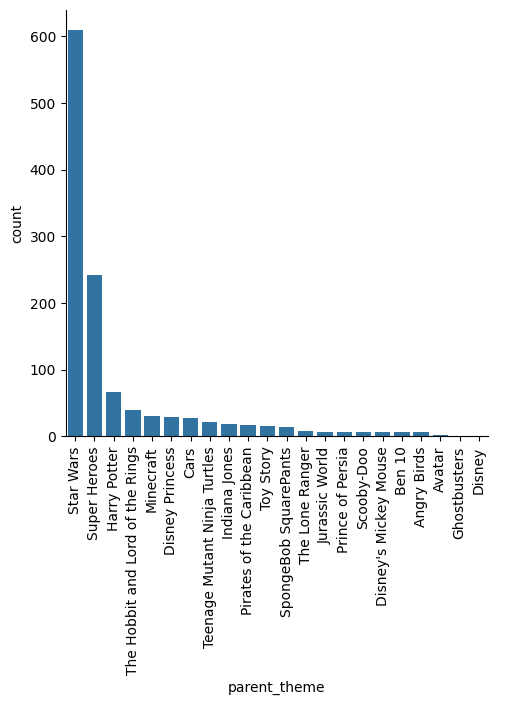

C:\Users\sarmi\AppData\Local\Temp\ipykernel_6784\3732656946.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  the_force = int(round((star_wars_count/licensed_theme_counts['count'].sum())*100))


52

In [9]:
licensed_theme_counts = licensed_sets.value_counts('parent_theme').reset_index()
print(licensed_theme_counts)

sns.catplot(kind = 'bar', data = licensed_theme_counts, x = 'parent_theme', y = 'count')
plt.xticks(rotation = 90)
plt.show()

star_wars_count = licensed_theme_counts[licensed_theme_counts['parent_theme'] == 'Star Wars']['count']
the_force = int(round((star_wars_count/licensed_theme_counts['count'].sum())*100))
the_force

In [10]:
popularity_by_year = licensed_sets.groupby(['year','parent_theme'], as_index = True).agg(theme_count = ('parent_theme','count'))

idx = popularity_by_year.groupby('year')['theme_count'].idxmax()

most_popular_by_year = popularity_by_year.loc[idx].reset_index()
print(most_popular_by_year)

new_era = int(most_popular_by_year[most_popular_by_year['parent_theme'] != 'Star Wars']['year'])
new_era

    year  parent_theme  theme_count
0   1999     Star Wars           13
1   2000     Star Wars           26
2   2001     Star Wars           14
3   2002     Star Wars           28
4   2003     Star Wars           32
5   2004     Star Wars           20
6   2005     Star Wars           28
7   2006     Star Wars           11
8   2007     Star Wars           16
9   2008     Star Wars           23
10  2009     Star Wars           39
11  2010     Star Wars           30
12  2011     Star Wars           32
13  2012     Star Wars           43
14  2013     Star Wars           35
15  2014     Star Wars           45
16  2015     Star Wars           58
17  2016     Star Wars           61
18  2017  Super Heroes           72


C:\Users\sarmi\AppData\Local\Temp\ipykernel_6784\1598409023.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  new_era = int(most_popular_by_year[most_popular_by_year['parent_theme'] != 'Star Wars']['year'])


2017

In [12]:
print(f'% Star Wars lego sets of all: {the_force}')
print(f'The year when Star Wars sets were not leader: {new_era}')

%Star Wars lego sets of all: 52
The year when Star Wars sets were not leader: 2017
